In [1]:
# import libraries
!pip install xgboost
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Load data 
business_df = pd.read_csv('Data/yelp_business_census_cleaned.csv')
# Get rid of state rows that only have 1 record (XMS and HI) only
business_df = business_df = business_df.loc[(business_df["state"] != 'XMS') & (business_df["state"] != 'HI')]

In [3]:
# Drop columns not needed for machine learning models and get rid of state rows that only have 1 record (XMS and HI) only
business_df_ml = business_df.drop(['business_id','name','address','postal_code','latitude','longitude','categories','Null Count'], axis=1)

In [4]:
# Convert census columns to integers for consistency throughout the data
business_df_ml[['Total_Estimate_Households_per_Zip','Total_Estimate_Married-couple_Family_households','Total_Estimate_Nonfamily_households','Median_Income(dollars)','Mean_Income(dollars)']] = business_df_ml[['Total_Estimate_Households_per_Zip','Total_Estimate_Married-couple_Family_households','Total_Estimate_Nonfamily_households','Median_Income(dollars)','Mean_Income(dollars)']] .astype(int)

# Scale the census columns since most are binary

cols_to_normalize = ['Total_Estimate_Households_per_Zip','Total_Estimate_Married-couple_Family_households','Total_Estimate_Nonfamily_households','Median_Income(dollars)','Mean_Income(dollars)']

# create the MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

# fit and transform the data for the selected columns
business_df_ml[cols_to_normalize] = scaler.fit_transform(business_df_ml[cols_to_normalize])

# print the resulting dataframe
business_df_ml


,city,state,stars,review_count,Total_Estimate_Households_per_Zip,Total_Estimate_Married-couple_Family_households,Total_Estimate_Nonfamily_households,Median_Income(dollars),Mean_Income(dollars),open_weekends,...,GoodForKids,RestaurantsReservations,DogsAllowed,RestaurantsTableService,RestaurantsGoodForGroups,HasTV,HappyHour,DriveThru,NoiseLevel,Smoking
0,Philadelphia,PA,4.0,80,0.215397,0.114528,0.441748,0.221596,0.226374,1,...,0,0,0,0,0,0,0,0,0,0
1,Green Lane,PA,4.5,13,0.046119,0.062895,0.034369,0.339683,0.306172,1,...,1,0,0,0,0,0,0,0,0,0
2,Ashland City,TN,2.0,6,0.187709,0.224579,0.159063,0.214127,0.144088,1,...,1,0,0,0,1,1,0,1,0,0
3,Nashville,TN,1.5,10,0.417889,0.273380,0.462186,0.172387,0.115288,1,...,1,0,0,0,0,1,0,1,0,0
4,Tampa Bay,FL,4.0,10,0.236840,0.142782,0.431032,0.276290,0.289810,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44577,Clifton Heights,PA,3.0,11,0.263809,0.273643,0.275720,0.258426,0.183294,1,...,0,0,0,0,0,0,0,0,0,0
44578,Boise,ID,4.0,33,0.451049,0.470495,0.537967,0.197276,0.139287,1,...,1,0,0,0,1,0,0,0,3,0
44579,Oro Valley,AZ,4.5,41,0.268811,0.375329,0.235073,0.374007,0.285455,1,...,0,0,0,0,0,0,0,0,0,0
44580,Philadelphia,PA,4.5,35,0.503219,0.408522,0.790416,0.345782,0.358013,1,...,1,0,0,1,1,1,0,0,0,0


In [ ]:
# Only run this column when want to run models with no city or state information
business_df_no_city_state = business_df_ml.drop(['state','city'], axis=1)
business_df_no_city_state

,stars,review_count,Total_Estimate_Households_per_Zip,Total_Estimate_Married-couple_Family_households,Total_Estimate_Nonfamily_households,Median_Income(dollars),Mean_Income(dollars),open_weekends,open_monday,RestaurantsDelivery,...,GoodForKids,RestaurantsReservations,DogsAllowed,RestaurantsTableService,RestaurantsGoodForGroups,HasTV,HappyHour,DriveThru,NoiseLevel,Smoking
0,4.0,80,0.215397,0.114528,0.441748,0.221596,0.226374,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,13,0.046119,0.062895,0.034369,0.339683,0.306172,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,6,0.187709,0.224579,0.159063,0.214127,0.144088,1,0,1,...,1,0,0,0,1,1,0,1,0,0
3,1.5,10,0.417889,0.273380,0.462186,0.172387,0.115288,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,4.0,10,0.236840,0.142782,0.431032,0.276290,0.289810,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44577,3.0,11,0.263809,0.273643,0.275720,0.258426,0.183294,1,0,1,...,0,0,0,0,0,0,0,0,0,0
44578,4.0,33,0.451049,0.470495,0.537967,0.197276,0.139287,1,0,0,...,1,0,0,0,1,0,0,0,3,0
44579,4.5,41,0.268811,0.375329,0.235073,0.374007,0.285455,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44580,4.5,35,0.503219,0.408522,0.790416,0.345782,0.358013,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [5]:
#Convert state and city columns using dummy variables method
 
business_df_ml = pd.get_dummies(data=business_df_ml,columns=['state','city'],drop_first=True)
business_df_ml.head()

,stars,review_count,Total_Estimate_Households_per_Zip,Total_Estimate_Married-couple_Family_households,Total_Estimate_Nonfamily_households,Median_Income(dollars),Mean_Income(dollars),open_weekends,open_monday,RestaurantsDelivery,...,city_Zionsville,city_boise,city_clearwater,city_erdenheim,city_goodlettsville,city_lawrence,city_philadelphia,city_sewell,city_wilmington,city_wimauma
0,4.0,80,0.215397,0.114528,0.441748,0.221596,0.226374,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,13,0.046119,0.062895,0.034369,0.339683,0.306172,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,6,0.187709,0.224579,0.159063,0.214127,0.144088,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.5,10,0.417889,0.273380,0.462186,0.172387,0.115288,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.0,10,0.236840,0.142782,0.431032,0.276290,0.289810,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Filter out city dummy variable columns with less than 50 positive values to make sure training ands test sets get enough data
cities_under_50_samples = business_df['city'].value_counts()[business_df['city'].value_counts() < 50].index
column_names_cities_under_50_samples = ['city_' + i for i in cities_under_50_samples]

business_df_ml_filtered = business_df_ml.drop(column_names_cities_under_50_samples, axis=1)
business_df_ml_filtered.shape


(44580, 186)

In [ ]:
# Separate input variables that do not include the city or state
X_no_city_state = business_df_no_city_state.loc[:,business_df_no_city_state.columns != 'stars']
y_no_city_state = business_df_no_city_state['stars']

In [7]:
# Separate input and target variables based on filtered cities with greater than 50 records to make sure train and test data can get distributed properly
X_filtered = business_df_ml_filtered.loc[:,business_df_ml_filtered.columns != 'stars']
y_filtered = business_df_ml_filtered['stars']

# Linear Regression Models

## Running Linear Regression model on No city or state in data

In [ ]:
# No city or state in x data for  cross validation

# Linear regression 5 cross validation shown in a different manner

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Create a Linear Regression model
model = LinearRegression()

# Create a KFold object with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Load your dataset and split into X and y variables

# Train the model using cross-validation
cv_results = cross_validate(model, X_no_city_state, y_no_city_state, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


Test accuracy scores: [0.25227793 0.25244763 0.27369837 0.2699533  0.26177368]
Mean accuracy score: 0.26203018119984944
Standard deviation of accuracy score: 0.00878544209386832


## Running Linear Regression model on Filtered City and State dummy variables

In [8]:
# Filtered City and State dummy variables

# Linear regression 5 cross validation shown in a different manner

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
import numpy as np

# Create a Linear Regression model
model = LinearRegression()

# Create a KFold object with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Load your dataset and split into X and y variables

# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


Test accuracy scores: [0.25340774 0.2550241  0.27250428 0.26819607 0.26376952]
Mean accuracy score: 0.26258034294151045
Standard deviation of accuracy score: 0.007384692967007022


# XG Boost Models

## Running XG Boost model on Filtered City and State dummy variables for cross validation

In [10]:
# Importing libraries needed
!pip install xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True)

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test accuracy scores: [0.34848297 0.35071212 0.37719984 0.36513522 0.36654952]
Mean accuracy score: 0.36161593313667695
Standard deviation of accuracy score: 0.010685987712607151


## Running XG Boost model on No city or state in x data for  cross validation

In [ ]:
# Importing libraries needed
!pip install xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor()

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_no_city_state, y_no_city_state, cv=kfold, scoring='r2', return_train_score=True) 

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test accuracy scores: [0.34562011 0.35210983 0.37316091 0.3634792  0.36358308]
Mean accuracy score: 0.3595906238755532
Standard deviation of accuracy score: 0.009657647057206013


# Neural Network Models

## Neural Network model with no city and no state data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create the neural network regression model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

# Perform 5-fold cross-validation and get the R2 scores
scores = cross_val_score(model, X_no_city_state, y_no_city_state, cv=5, scoring='r2')

# Print the R2 scores for each fold
print('Test accuracy scores:', scores)

# Calculate and print the mean R2 score
mean_score = np.mean(scores)
print('Mean accuracy score:', mean_score)

std_score = np.std(scores)
print('Standard deviation of accuracy score:', std_score)

Test accuracy scores: [0.32566656 0.008539   0.3252018  0.3126085  0.32616411]
Mean accuracy score: 0.259635992102491
Standard deviation of accuracy score: 0.1256508523561539


## Neural Network model with Filtered City and State dummy variables

In [11]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Create the neural network regression model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)

# Perform 5-fold cross-validation and get the R2 scores
scores = cross_val_score(model, X_filtered, y_filtered, cv=5, scoring='r2')

# Print the R2 scores for each fold
print('Test accuracy scores:', scores)

# Calculate and print the mean R2 score
mean_score = np.mean(scores)
print('Mean accuracy score:', mean_score)

std_score = np.std(scores)
print('Standard deviation of accuracy score:', std_score)

Test accuracy scores: [0.26490832 0.25040739 0.30344796 0.19418593 0.32117811]
Mean accuracy score: 0.26682554105980383
Standard deviation of accuracy score: 0.04437374812056849


# Tuning XG Boost Models

## Enhancing city and state filtered data

Training model with learning rate = 0.1...
Training RMSE: 0.6820, Validation RMSE: 0.7112
Training model with learning rate = 0.05...
Training RMSE: 0.6972, Validation RMSE: 0.7170
Training model with learning rate = 0.01...
Training RMSE: 1.3540, Validation RMSE: 1.3545
Training model with learning rate = 0.005...
Training RMSE: 2.0161, Validation RMSE: 2.0159
Training model with learning rate = 0.001...
Training RMSE: 2.8915, Validation RMSE: 2.8924


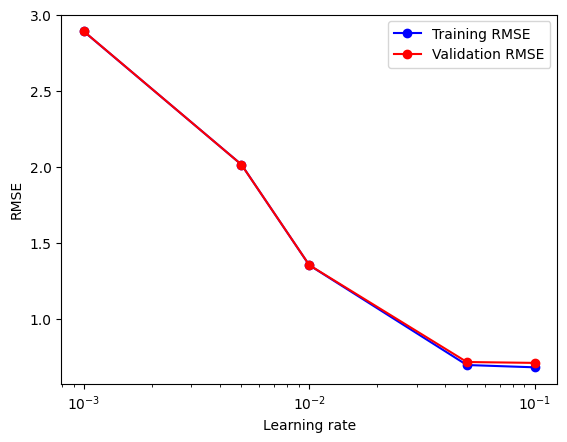

Best learning rate: 0.1000


In [12]:
# Enhance learning rate for xgboost model
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Load your data and split it into training and validation sets
# Determine the percentage of data to be used for validation
validation_size = 0.2

# Use the train_test_split function to split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y_filtered, test_size=validation_size, random_state=42)

# Define a range of learning rates to try
learning_rates = [0.1, 0.05, 0.01, 0.005, 0.001]

# Define the other hyperparameters of the model
params = {
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Initialize lists to store the performance and learning rate values
train_scores = []
val_scores = []

# Train the model for each learning rate
for rate in learning_rates:
    print(f'Training model with learning rate = {rate}...')
    # Update the learning rate parameter
    params['learning_rate'] = rate
    # Create the XGBoost regressor model
    model = xgb.XGBRegressor(**params)
    # Train the model
    model.fit(X_train, y_train)
    # Get the predictions on the training and validation sets
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    # Compute the mean squared error for the training and validation sets
    train_score = np.sqrt(np.mean((train_preds - y_train)**2))
    val_score = np.sqrt(np.mean((val_preds - y_val)**2))
    # Add the scores to the lists
    train_scores.append(train_score)
    val_scores.append(val_score)
    print(f'Training RMSE: {train_score:.4f}, Validation RMSE: {val_score:.4f}')

# Plot the performance vs. learning rate
plt.plot(learning_rates, train_scores, 'bo-', label='Training RMSE')
plt.plot(learning_rates, val_scores, 'ro-', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Choose the learning rate with the best performance on the validation set
best_learning_rate = learning_rates[np.argmin(val_scores)]
print(f'Best learning rate: {best_learning_rate:.4f}')


In [13]:
# Find optimal max_depth and optimal min_child_weight for xgboost model
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create the XGBoost regression model
model = xgb.XGBRegressor(learning_rate=0.10)

# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [5, 6, 7],
    'min_child_weight': [4, 5, 6]
}

# Perform a grid search with cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_filtered, y_filtered)

# Print the optimal hyperparameters and the corresponding mean squared error
print('Optimal max_depth:', grid_search.best_params_['max_depth'])
print('Optimal min_child_weight:', grid_search.best_params_['min_child_weight'])
print('Best neg_mean_squared_error:', grid_search.best_score_)


Optimal max_depth: 7
Optimal min_child_weight: 6
Best neg_mean_squared_error: -0.4899812478012328


In [15]:
# Tuning gamma parameter of the xgboost model
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'gamma': [0, 0.1, 0.5, 1, 10]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_filtered, y_filtered)

# Print the best hyperparameters
print("Best gamma: ", grid_search.best_params_['gamma'])


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Best gamma:  0.5


In [10]:
# Tune subsample and colsample_bytree 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_filtered, y_filtered)

# Print the best hyperparameters
print("Best subsample: ", grid_search.best_params_['subsample'])
print("Best colsample_bytree: ", grid_search.best_params_['colsample_bytree'])


Best subsample:  1.0
Best colsample_bytree:  0.6


In [0]:
# Optimizing regularlization parameters
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# define the parameter grid
param_grid = {
    'reg_alpha': [0.01, 0.1, 1, 10],
    'reg_lambda': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10]
}

# define the XGBoost model
xgb_model = xgb.XGBRegressor()

# perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_filtered, y_filtered)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'gamma': 0.1, 'reg_alpha': 10, 'reg_lambda': 10}
Best score:  0.3774976575423641


In [8]:
# Lower the learning rate and add more trees for optimizing model
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Define the XGBoost model with default hyperparameters
xgb_model = xgb.XGBRegressor()

# Set the learning rate to 0.1 (default value)
xgb_model.set_params(learning_rate=0.1)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.33, random_state=42)
# Fit the model to the data with 100 trees
xgb_model.fit(X_filtered, y_filtered, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

# Evaluate the model on the test data
score = xgb_model.score(X_test, y_test)
print("Model score with 100 trees:", score)

# Lower the learning rate to 0.01 and add 900 more trees
xgb_model.set_params(learning_rate=0.01, n_estimators=5000)

# Fit the model to the data with 1000 trees
xgb_model.fit(X_filtered, y_filtered, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

# Evaluate the model on the test data
score = xgb_model.score(X_test, y_test)
print("Model score with 5000 trees and lower learning rate:", score)


[4002]	validation_0-rmse:0.63746
[4003]	validation_0-rmse:0.63745
[4004]	validation_0-rmse:0.63743
[4005]	validation_0-rmse:0.63742
[4006]	validation_0-rmse:0.63740
[4007]	validation_0-rmse:0.63740
[4008]	validation_0-rmse:0.63738
[4009]	validation_0-rmse:0.63737
[4010]	validation_0-rmse:0.63735
[4011]	validation_0-rmse:0.63734
[4012]	validation_0-rmse:0.63732
[4013]	validation_0-rmse:0.63730
[4014]	validation_0-rmse:0.63728
[4015]	validation_0-rmse:0.63727
[4016]	validation_0-rmse:0.63726
[4017]	validation_0-rmse:0.63725
[4018]	validation_0-rmse:0.63724
[4019]	validation_0-rmse:0.63723
[4020]	validation_0-rmse:0.63722
[4021]	validation_0-rmse:0.63720
[4022]	validation_0-rmse:0.63719
[4023]	validation_0-rmse:0.63718
[4024]	validation_0-rmse:0.63716
[4025]	validation_0-rmse:0.63716
[4026]	validation_0-rmse:0.63715
[4027]	validation_0-rmse:0.63714
[4028]	validation_0-rmse:0.63712
[4029]	validation_0-rmse:0.63711
[4030]	validation_0-rmse:0.63710
[4031]	validation_0-rmse:0.63708
[4032]	val

## Tuned XGBoost model Results

In [9]:
# Importing libraries needed
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor(learning_rate=0.100, max_depth=7,min_child_weight=6,gamma=0.1,subsample=1.0,colsample_bytree=0.6,reg_alpha=10,reg_lambda=10,n_estimators=5000)

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True) 

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))

Test accuracy scores: [0.35920112 0.36933599 0.38533898 0.38060422 0.38151048]
Mean accuracy score: 0.37519815809113743
Standard deviation of accuracy score: 0.009614335543736703


In [10]:
# Running tuned model with n_trees = 100
# Importing libraries needed

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost model
model = xgb.XGBRegressor(learning_rate=0.100, max_depth=7,min_child_weight=6,gamma=0.1,subsample=1.0,colsample_bytree=0.6,reg_alpha=10,reg_lambda=10,n_estimators=100)

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


# Train the model using cross-validation
cv_results = cross_validate(model, X_filtered, y_filtered, cv=kfold, scoring='r2', return_train_score=True) 

# Print the accuracy scores for each fold
print("Test accuracy scores:", cv_results['test_score'])

# Print the mean and standard deviation of the accuracy scores
print("Mean accuracy score:", np.mean(cv_results['test_score']))
print("Standard deviation of accuracy score:", np.std(cv_results['test_score']))

Test accuracy scores: [0.36353195 0.3673779  0.39330337 0.38061542 0.38268605]
Mean accuracy score: 0.37750293989962874
Standard deviation of accuracy score: 0.010806579603627126


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcd92ccc-2af6-49a1-bc78-ae9f0a350628' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>